# Information and Warning (Note)

This article/notebook is created by Sirawich Smitsomboon under Super AI Engineer (22p21c0207)

โน็ตบุค/บทความนี้ได้สร้างขึ้นโดย สิรวิชญ์ สมิทธ์สมบูรณ์ ในโครงการ Super AI Engineer (รหัสโครงการ 22p21c0207)

Note:
* บางครั้งอาจมีโค้ดซ่อนใน Section ต่างๆ สามารถกดดูได้ โดยจะมีปุ่มที่เขียนว่า `Code` อยู่
* บทความนี้เป็นการสรุปตามความเข้าใจของผม หากท่านเห็นว่าสิ่งใดผิดพลาดหรือมีข้อแนะนำประการใด ท่านสามารถ Comment ได้

In [1]:
# Setup Code
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1. Introduction: Machine Learning Pipeline

# 1.1 Step การทำงานของ Machine Learning ทั่วๆ ไป (Typical Workflow of Machine Learning)

1. Feature Extraction
2. Modeling
3. Evaluation

# 1.1.1 Feature Extraction

Feature Extraction - การสร้าง หา หรือเลือก Feature ที่จะมาใช้ใน Machine Learning

Feature ที่ใช้ใน Machine Learning จะเรียกว่า 'X'

การ Extract Feature นั้นก็จะขึ้นอยู่กับโจทย์แต่ละข้อด้วย

"Garbage In, Garbage Out" 
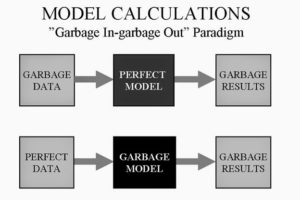
Source: https://precisionchiroco.com/garbage-in-garbage-out/

หมายความว่า
* ถ้า Feature ไม่ดี แต่ Model   ดี - Result ที่ออกมาก็จะไม่ดี
* ถ้า Model   ไม่ดี แต่ Feature ดี - Result ที่ออกมาก็จะไม่ดี

สรุปสั้นๆ ก็คือ ควรจะต้องดีทั้งคู่

**ตัวอย่างของ Feature Extraction**

Example 1L Feature Extraction จากข้อมูลในตารางที่มีอยู่แล้ว

In [2]:
Data = pd.read_csv('../input/home-data-for-ml-course/train.csv')

In [3]:
# Print top 5 rows of Data
print("This is 'Data'")
display(Data.head())

# Feature Extraction
DataX = Data[["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]]

# Display Table with Extracted Feature
print("This is Data with Extracted Feature")
display(DataX.head())

This is 'Data'


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


This is Data with Extracted Feature


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


Example 2: Feature Extraction จากรูปภาพ

In [4]:
import cv2
Images = []
for x in range(1,4):
    Image = cv2.imread(f"../input/covid19-image-dataset/Covid19-dataset/train/Covid/0{x}.jpeg")
    Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
    Image = cv2.resize(Image, (224, 224))
    Images.append(Image)
Images = np.array(Images) / 255.0

553467904/553467096 [==============================] - 14s 0us/step


array([[1.9209001e-04, 1.8104984e-03, 5.6009361e-04, ..., 7.0159113e-05,
        2.2511021e-04, 3.0706275e-02],
       [1.8902798e-04, 1.9674264e-03, 5.5371795e-04, ..., 7.7343197e-05,
        2.1754125e-04, 2.5705660e-02],
       [1.9607121e-04, 2.1890122e-03, 7.8201765e-04, ..., 5.0767692e-05,
        2.1936758e-04, 2.5030712e-02]], dtype=float32)

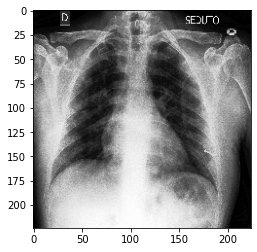

In [5]:
from tensorflow.keras.applications import VGG16

# Show one of the Images
plt.imshow(Images[0])

# Initialize VGG16 Model
# Note: VGG16 is the model that extracts feature from the image
FE = VGG16()

# Get the feature
DataX = FE.predict(Images)

display(DataX)

Note: Feature ของ Image นั้นเราอาจจะอ่านไม่ออกด้วยตัวเอง แต่เป็นข้อมูลที่่คอมพิวเตอร์เข้าใจ

# 1.1.2 Modeling

Modeling คือการ Train Model เพื่อจะนำไป Predict ค่าของผลลัพท์ต่อๆ ไป

**Train Test Split** - การแบ่งข้อมูลบางส่วนไป Validate Model หรือ Test Model ซึ่งจะนำไปใช้ในการ Predict และ Validate ใน **1.1.3 Evaluation**

In [6]:
Data = pd.read_csv('../input/home-data-for-ml-course/train.csv')

DataX = Data[["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]]

DataY = Data['SalePrice']

มีวิธี 2 วิธีหลักๆ ในการแบ่ง

1. ใช้ Library ในการแบ่ง เหมาะสำหรับการแบ่ง

In [7]:
from sklearn.model_selection import train_test_split

TrainX, TrainY, ValX, ValY = train_test_split(DataX, DataY, train_size = 0.9)

print("TrainX")
display(TrainX)

print("ValX")
display(ValX)

print("TrainY")
display(TrainY)

print("ValY")
display(ValY)

# กดปุ่ม Output เพื่อดูข้อมูลใน TrainX, ValX, TrainY, และ ValY

TrainX


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
175,12615,1950,2158,0,2,4,7
708,9018,2007,728,728,2,3,8
1131,10712,1991,974,0,1,3,5
163,5500,1956,882,0,1,1,4
778,8400,1977,2020,0,2,4,10
...,...,...,...,...,...,...,...
381,7200,2006,1301,0,2,2,5
730,5389,1995,1616,0,2,2,5
1359,16737,2004,1980,0,2,3,8
160,11120,1984,1232,0,2,3,6


ValX


175     243000
708     179540
1131     93500
163     103200
778     144000
         ...  
381     187750
730     236500
1359    315000
160     162500
1442    310000
Name: SalePrice, Length: 1314, dtype: int64

TrainY


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
1059,11275,1932,1096,895,1,3,7
1137,6342,1875,780,240,1,2,6
1323,5330,1940,708,0,1,2,5
392,8339,1959,882,0,1,3,5
297,7399,1997,975,975,2,3,7
...,...,...,...,...,...,...,...
502,9170,1965,1214,0,1,2,6
1241,9849,2007,1689,0,2,3,7
851,3196,2003,1456,0,2,2,7
798,13518,2008,1966,1174,3,4,11


ValY


1059    220000
1137     94000
1323     82500
392     106500
297     239000
         ...  
502     140000
1241    248328
851     215000
798     485000
237     194500
Name: SalePrice, Length: 146, dtype: int64

2. เขียนโปรแกรมแบ่งเอง หากไม่ค่อยมีความจำเป็นที่ต้องใช้ Library เช่นไม่ต้อง Shuffle Data

In [8]:
i = round(len(DataX) * 0.9)

TrainX = DataX[:i]
print("TrainX")
display(TrainX)

ValX = DataX[i:]
print("ValX")
display(ValX)

TrainY = DataY[:i]
print("TrainY")
display(TrainY)

ValY = DataY[i:]
print("ValY")
display(ValY)

# กดปุ่ม Output เพื่อดูข้อมูลใน TrainX, ValX, TrainY, และ ValY

TrainX


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1309,7153,1991,1294,0,2,3,6
1310,17500,1959,1902,0,2,3,7
1311,8814,2005,1274,0,2,3,6
1312,9572,1990,1453,1357,2,4,9


ValX


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
1314,8190,1954,948,0,1,3,5
1315,11075,1969,1092,1020,2,4,9
1316,10226,2008,1630,0,2,3,8
1317,4230,2006,1352,0,2,2,5
1318,14781,2001,1787,0,2,3,7
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


TrainY


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1309    179200
1310    335000
1311    203000
1312    302000
1313    333168
Name: SalePrice, Length: 1314, dtype: int64

ValY


1314    119000
1315    206900
1316    295493
1317    208900
1318    275000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 146, dtype: int64

**สร้าง Model**

Model จะมีลักษณะการทำงานังนี้
1. เลือก Model ที่ต้องการใช้ และสร้างขึ้นมา
2. Train หรือ Fit Model ที่สร้างขึ้น
3. Predict คำตอบ

Example: Simple Decision Tree Regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor

# สร้าง Model
SKLDecisionTreeRegModel = DecisionTreeRegressor(random_state=1);

# Fit Model (หรือ Train Model) โดยใช้ TrainX กับ TrainY
SKLDecisionTreeRegModel.fit(TrainX,TrainY)

# Predict Value โดยใช้ ValX ให้ได้ Prediction (Predict ค่า Y)
Prediction = SKLDecisionTreeRegModel.predict(ValX)

# 1.1.3 Model Evaluation

**Model evaluation** - การคำนวนประสิทธิภาพ Model

**Metrics** - คำนวนความถูกผิด ส่วนใหญ่จะคำนวนเป็นค่า Error หรือ Accuracy เพื่อใช้ในการเช็คประสิทธิภาพของ Model

**Ground truths** - ปัญหาที่ยากจะตัดสินความถูกผิด เนื่องจากไม่มีคำตอบที่ถูกต้องจริงๆ เช่น Model แปลภาษา คำว่า `'ไปไหน'`
* Model 1: `'Where are you going?'`
* Model 2: `'Where to?'`

**Labelling การกำหนดค่าให้ input / output**
* Labelling issues  เช่นเท่าไหร่คือขาว/ดำ เท่าไร่คือผิดถูก 

**Metrics ที่ใช้บ่อยๆ**
* Error rate
* Accuracy rate
* Precision
* True positive
* Recall
* False alarm
* F score

**การเลือก Metrics**
* เลือก Metrics ให้ใกล้เคียงกับความต้องการของเรา แต่ก็ใช้ Metric อื่นๆ ด้วยก็ดี เนื่องจาก Metric อื่นๆ ก็สามารถช่วยให้เราเลือก Model กันได้
* หากมี Sub-metric ก็ควรจะนำมาใช้

**Cost (or Loss) function**

L2 = Mean square error

![Mean Square Error](https://datavedas.com/wp-content/uploads/2018/04/image003-1.png)
Source: https://datavedas.com/wp-content/uploads/2018/04/image003-1.png

L1 = Mean absolute error

![Mean Absolute Error](https://datavedas.com/wp-content/uploads/2018/04/image017.png)
Source: https://datavedas.com/wp-content/uploads/2018/04/image017.png

L2 have more effect of outliner than L1

Example:

In [10]:
# สมมุติว่าทำ Model แล้วได้ค่าออกมาดังนี้
Prediction = [1,1,2,3,4,5,3,1,2,4,100] # 100 = Outlier

# ข้อมูล Validation ที่ใช้ในการเช็ค
ValY       = [2,1,2,4,2,3,4,3,2,3,  3]

In [11]:
from sklearn.metrics import mean_absolute_error

Score = mean_absolute_error(ValY,Prediction)

print(Score)

9.727272727272727


In [12]:
from sklearn.metrics import mean_squared_error

Score = mean_squared_error(ValY,Prediction)

print(Score)

856.8181818181819


# 2. ชนิดของ Machine Learning และระบบการ Train Model

การ Modeling คือการนำข้อมูล Feature ที่ได้จาก Feature Extraction มาประมวลผลกับ Model ของ Machine Learning ซึ่งแยกออกไปได้ 3 ชนิต หลักๆ

1. Supervised Learning
2. Unsupervised Learning
3. Semi-supervised Learning
4. Self-supervised learning
5. Reinforcement Learning
6. Representation learning

**Supervised Learning** - การเรียนของ Machine Learning โดยให้ทั้ง X และ Y

Note: Y คือคำตอบของ Machine Learning เช่น
* หากจะคำนวนราคาบ้าน ราคาบ้านเป็น Y
* หากจะจำแนกว่าสัตว์ตัวนี้คือสุนัขหรือแมว ประเภทสัตว์คือค่า Y

In [13]:
# Load Data Again

Data = pd.read_csv('../input/home-data-for-ml-course/train.csv')

DataX = Data[["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]]

DataY = Data['SalePrice']

i = round(len(DataX) * 0.9)

TrainX = DataX[:i]
print("TrainX")
display(TrainX)

ValX = DataX[i:]
print("ValX")
display(ValX)

TrainY = DataY[:i]
print("TrainY")
display(TrainY)

ValY = DataY[i:]
print("ValY")
display(ValY)

# กดปุ่ม Output เพื่อดูข้อมูลใน TrainX, ValX, TrainY, และ ValY

TrainX


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1309,7153,1991,1294,0,2,3,6
1310,17500,1959,1902,0,2,3,7
1311,8814,2005,1274,0,2,3,6
1312,9572,1990,1453,1357,2,4,9


ValX


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
1314,8190,1954,948,0,1,3,5
1315,11075,1969,1092,1020,2,4,9
1316,10226,2008,1630,0,2,3,8
1317,4230,2006,1352,0,2,2,5
1318,14781,2001,1787,0,2,3,7
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


TrainY


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1309    179200
1310    335000
1311    203000
1312    302000
1313    333168
Name: SalePrice, Length: 1314, dtype: int64

ValY


1314    119000
1315    206900
1316    295493
1317    208900
1318    275000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 146, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeRegressor

# สร้าง Model
SKLDecisionTreeRegModel = DecisionTreeRegressor(random_state=1);

# Fit Model (หรือ Train Model) โดยใช้ TrainX กับ TrainY
SKLDecisionTreeRegModel.fit(TrainX,TrainY)

# Predict Value โดยใช้ ValX ให้ได้ Prediction (Predict ค่า Y)
Prediction = SKLDecisionTreeRegModel.predict(ValX)

In [15]:
# สามารถดู Code หรือ Output ได้ เพื่อดูผลลัพท์ของ Model

print("Prediction")
display(Prediction)
print("Validation Y")
display(ValY)

Prediction


array([116000., 154300., 293077., 172500., 312500., 110000., 139000.,
       120500., 236000.,  87000., 370878., 109500.,  76000., 138000.,
       315000., 164000., 279500., 122000.,  82000., 128000., 122500.,
       171500., 188000.,  87000., 284000., 111250., 115000., 159000.,
       237000., 192000., 179540., 127500., 180000., 315000., 259000.,
       117500., 190000., 173000.,  60000., 380000., 231500., 156000.,
       100000., 167000., 177000., 440000., 299800., 259000.,  87000.,
       215200., 151000., 208500., 211000., 110000., 140000., 284000.,
       107500., 115000., 220000., 394432., 252000., 235128.,  73000.,
       139000., 100000., 179540.,  67000., 244000., 200100., 223500.,
       116000., 109500., 190000., 214500., 315000., 115000., 205000.,
       150000., 119900.,  87000., 209500., 309000., 256000.,  79000.,
       155000., 135000., 127500., 176000., 202665., 256300., 110000.,
       235000.,  88000.,  93500., 205000., 277000., 231500., 128000.,
        87500., 3708

Validation Y


1314    119000
1315    206900
1316    295493
1317    208900
1318    275000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 146, dtype: int64

**Unsupervised Learning** - การเรียนของ Machine Learning โดยให้แค่แกน X เช่นในการ Clustering

Blue = TrainX, Orange = ValX


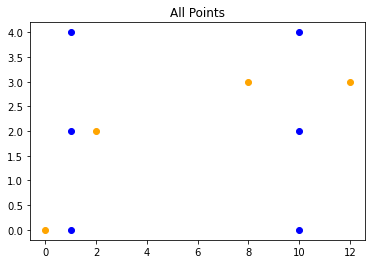

In [16]:
# สร้าง Data จำลองมาเพื่อใช้เป็นตัวอย่าง
TrainX = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
ValX = np.array([[0, 0], [12, 3], [2, 2], [8, 3]])

# Graph TrainX
print("Blue = TrainX, Orange = ValX")
plt.title("All Points")
plt.scatter(TrainX[:,0],TrainX[:,1],c="blue")
plt.scatter(ValX[:,0],ValX[:,1],c="orange")
plt.show()

In [17]:
# Example Copied From https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
from sklearn.cluster import KMeans

# สร้าง Model
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit Model (หรือ Train Model)
kmeans.fit(TrainX)

# Predict Model
Prediction = kmeans.predict(ValX)

display(Prediction)

array([1, 0, 1, 0], dtype=int32)

**Semi-supervised Learning** - การเรียนของ Machine Learning โดยให้ทั้ง X และบางค่าของ Y

**Self-supervised Learning** - การที่ AI หาข้อมูลเพิ่มเอง เช่น มีภาพแล้วหมุนภาพแล้วเรียนรู้หลายๆ องศา

**Reinforcement Learning**
* การเรียนรู้เอง โดยการให้คะแนนเอง
* มี Goal แล้วหาวิธีที่จะไปหา Goal
* ให้ AI ลองผิดลองถูก
* ไม่ใช้ Concept ของ X กับ Y หรือ Train กับ Test set
* เช่น Alpha Go เป็นต้น

**Representation learning** - การที่ AI เรียนรู้ที่จะหา Feature เช่น Transfer learning

# 2. Regression

Regression เป็นชนิดของ Model ที่ Predict ค่าที่เป็น Quantity

# 2.1 Regularization

**Regularization** ใช้ในการลดการ Overfiting โดยจะมี L1 Regularization กับ L2 Regularization (ไม่ใช่อย่างเดียวกับ L1 Loss กับ L2 Loss)

![L1 and L2 Regularization](https://miro.medium.com/max/550/1*-LydhQEDyg-4yy5hGEj5wA.png)
Source: https://miro.medium.com/max/550/1*-LydhQEDyg-4yy5hGEj5wA.png

เมื่อเราพยายาม Minimize Loss Function ก็จะต้องพยายามลดค่า Weight ด้วย โดยการใช้ L1 จะทำให้ได้ Weight = 0 ได้มากกว่า เหมาะกับการแก้ปัญหากรณี Feature เยอะเกินไป (ถ้า weight=0 Feature นั้นจะไม่มีผล)

Summary:
* การ Overfit สามารถแก้ได้โดยการใช้ Regularization
    * เพิ่ม Regularization Weights ถ้าเกิดการ Overfit ขึ้น
* การ Underfit สามารถแก้ไขได้โดยเพิ่ม Feature หรือใช้ Model ที่ซับซ้อนยิ่งขึ้น

**Regression Model** with Regularization
* Ridge regression: Regression with L2 regularization
* Lasso regression: Regression with L1 regularization
* ElasticNet regression: Regression with L1 and L2 regularization

In [18]:
# Load Data Again

Data = pd.read_csv('../input/home-data-for-ml-course/train.csv')

DataX = Data[["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]]

DataY = Data['SalePrice']

i = round(len(DataX) * 0.9)

TrainX = DataX[:i]
print("TrainX")
display(TrainX)

ValX = DataX[i:]
print("ValX")
display(ValX)

TrainY = DataY[:i]
print("TrainY")
display(TrainY)

ValY = DataY[i:]
print("ValY")
display(ValY)

# กดปุ่ม Output เพื่อดูข้อมูลใน TrainX, ValX, TrainY, และ ValY

TrainX


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1309,7153,1991,1294,0,2,3,6
1310,17500,1959,1902,0,2,3,7
1311,8814,2005,1274,0,2,3,6
1312,9572,1990,1453,1357,2,4,9


ValX


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
1314,8190,1954,948,0,1,3,5
1315,11075,1969,1092,1020,2,4,9
1316,10226,2008,1630,0,2,3,8
1317,4230,2006,1352,0,2,2,5
1318,14781,2001,1787,0,2,3,7
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


TrainY


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1309    179200
1310    335000
1311    203000
1312    302000
1313    333168
Name: SalePrice, Length: 1314, dtype: int64

ValY


1314    119000
1315    206900
1316    295493
1317    208900
1318    275000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 146, dtype: int64

Example: Using Ridge, Lasso, and ElasticNet regression in the model

In [19]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error

for m in [Ridge, Lasso, ElasticNet]:
    Model = m(random_state=0);
    
    Model.fit(TrainX,TrainY)
    
    Prediction = Model.predict(ValX)
    
    print(f"Model = {m}, Score = {mean_absolute_error(ValY, Prediction)}")

Model = <class 'sklearn.linear_model._ridge.Ridge'>, Score = 26955.795943742665
Model = <class 'sklearn.linear_model._coordinate_descent.Lasso'>, Score = 26962.275972622614
Model = <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>, Score = 25713.663211754127


# 2.2 Logistic Regression

ส่ง Linear Regression เข้าไปใน Logistic Function

In [20]:
from sklearn.datasets import load_iris
DataX, DataY = load_iris(return_X_y=True)

TrainX = DataX[:-2,:]
TrainY = DataY[:-2]
ValX = DataX[-2:,:]
ValY = DataY[:-2]

print("TrainX")
display(TrainX)

print("TrainY")
display(TrainY)

print("ValX")
display(ValX)

print("ValY")
display(ValY)

TrainX


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

TrainY


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

ValX


array([[6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

ValY


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# ใช้ Data จาก sklearn.datasets (กดปุ่ม Code หรือ Output ด้านบนเพื่อดู)

from sklearn.linear_model import LogisticRegression

Model = LogisticRegression(random_state=0);

Model.fit(TrainX,TrainY)

Prediction = Model.predict(ValX)

display(Prediction)

array([2, 2])

# 3. Clustering

Clustering เป็นรูปแบบหนึ่งของ Unsupervised Learning



**K-mean** แบ่ง Cluster ก่อน

Step การทำงาน

1. สุ่ม จำนวน Centroids ตามจำนวน Class ที่อยากได้ โดยเลือกจุดจาก Data ![Random an amount of Centroids](https://media.discordapp.net/attachments/761586679416619088/761586778322108436/unknown.png?width=250&height=250)
2. แยกจุดต่างๆ นั้นให้อยู่กับ Centroids ที่ใกล้ที่สุด ![Assign Points to the closest centroids](https://media.discordapp.net/attachments/761586679416619088/761587183311126558/unknown.png?width=250&height=250)
3. อัพเดท Centroids จาก Cluster แต่ละอัน ![Update Centroids](https://media.discordapp.net/attachments/761586679416619088/761587242228908032/unknown.png?width=250&height=250)
4. ทำข้อ 2-3 ซ้ำจนกว่า Centroid จะไม่เปลี่ยน ![](https://media.discordapp.net/attachments/761586679416619088/761587301070405642/unknown.png?width=250&height=250) ![](https://media.discordapp.net/attachments/761586679416619088/761587356653453322/unknown.png?width=250&height=250) ทำซ้ำไปเรื่อยๆ จนได้ ![](https://media.discordapp.net/attachments/761586679416619088/761587647940263946/unknown.png?width=250&height=250)

Interactive Example:
* http://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/
* https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Blue = TrainX, Orange = ValX


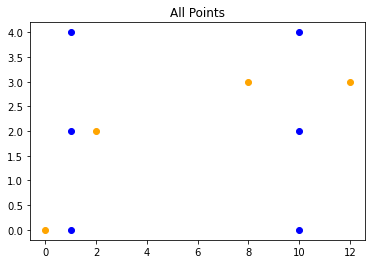

In [22]:
# สร้าง Data จำลองมาเพื่อใช้เป็นตัวอย่าง
TrainX = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
ValX = np.array([[0, 0], [12, 3], [2, 2], [8, 3]])

# Graph TrainX
print("Blue = TrainX, Orange = ValX")
plt.title("All Points")
plt.scatter(TrainX[:,0],TrainX[:,1],c="blue")
plt.scatter(ValX[:,0],ValX[:,1],c="orange")
plt.show()

In [23]:
# Example Copied From https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
from sklearn.cluster import KMeans

# สร้าง Model
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit Model (หรือ Train Model)
kmeans.fit(TrainX)

# Predict Model
Prediction = kmeans.predict(ValX)

display(Prediction)

array([1, 0, 1, 0], dtype=int32)

# 4. Classification

1. Nearest Neighbour Classification
2. K-Nearest Neighbour (kNN) Classification

# 4.1 Nearest Neighbour Classification

หลักการทำงาน - ดูจุดที่อยู่ใกล้ที่สุด

In [24]:
# Copied from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

print(neigh.kneighbors([[1., 1., 1.]]))

(array([[0.5]]), array([[2]]))


# 4.2 K-Nearest Neighbor (kNN) Classification

* ดูจุดที่ใกล้ K จุด
* ใช้กับ Feature มากๆไม่ค่อยดีเพราะ ค่า Sum จะมากเหมือนๆกันหมดจนแยกความแตกต่างได้ยาก

หลักการทำงาน
1. ให้ Query Data
2. จากจุด ทุกๆ จุด
    * คำนวนระยะทางกับ Query
    * หาจุดที่ใกล้ K ที่สุด
    * ให้ Label ด้วยระบบ Voting Scheme

# 5. Scikit-learn Algorithm Cheat-Sheet

![](https://scikit-learn.org/stable/_static/ml_map.png)
Source: https://scikit-learn.org/stable/_static/ml_map.png

# 6. Cautionary Notes

*"There's no free lunch"*

เป็น Theory ที่บอกว่าไม่มี Model ไหนที่ทำงานได้ดีในทุกๆ งาน

Model จะขึ้นอยู่กับ
* คำถาม/Goal
* ประเภทและความสำพันธ์ของ Data
* จำนวน Data

หา Model ที่ดีที่สุดโดยการลอง Model ต่างๆ

*“Deep learning is not magical”*